## Import Libraries

**Common Libraries**

1. **`pandas` (`pd`)**: Used for data manipulation and analysis, mainly in a DataFrame format.
2. **`numpy` (`np`)**: For numerical computing, multi-dimensional arrays and mathematical operations.
3. **`maplotlib.pyplot` (`plt`) & `seaborn` (`sns`)**: Statistical data visualization library
4. **`sklearn` (`scikit-learn`)**: ML library for data preprocessing, model training, and evaluation.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

## EDA

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/titanic/train.csv')

# Display the first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
# Check for missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Visualization

**Summary of Plots**

| **Plot Type**   | **Use Case**                                                                 |
|------------------|------------------------------------------------------------------------------|
| Histogram        | Distribution of a numerical variable.                                       |
| Bar Plot         | Compare values across categories.                                           |
| Count Plot       | Count occurrences of categorical data.                                      |
| Box Plot         | Distribution and outliers in numerical data.                                |
| Violin Plot      | Distribution of numerical data (combination of box plot and density plot).   |
| Scatter Plot     | Relationship between two numerical variables.                               |
| Pair Plot        | Pairwise relationships between numerical variables.                         |
| Heatmap          | Visualize correlations between numerical features.                          |
| Pie Chart        | Show proportions of categorical data.                                       |
| Line Plot        | Show trends over a continuous interval (e.g., time-series data).             |

Other types of plots: https://seaborn.pydata.org/examples/index.html

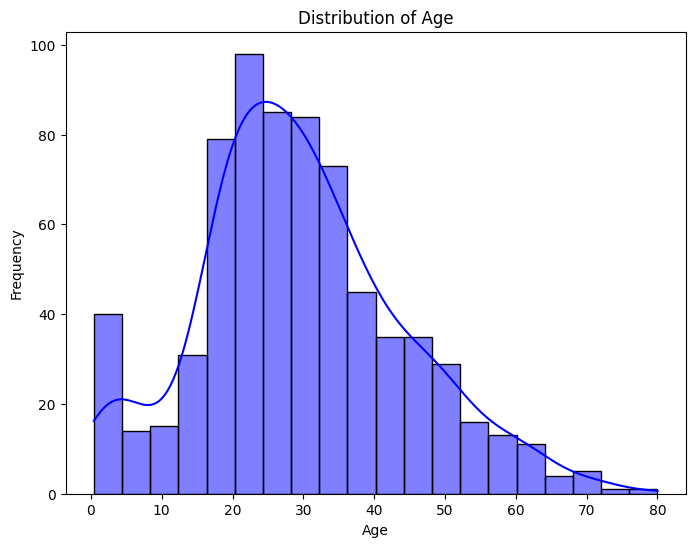

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

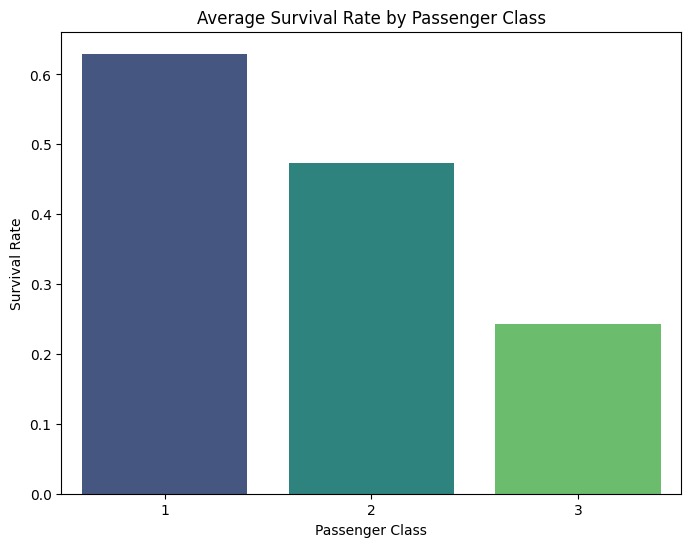

In [7]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df, ci=None, palette='viridis')
plt.title('Average Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

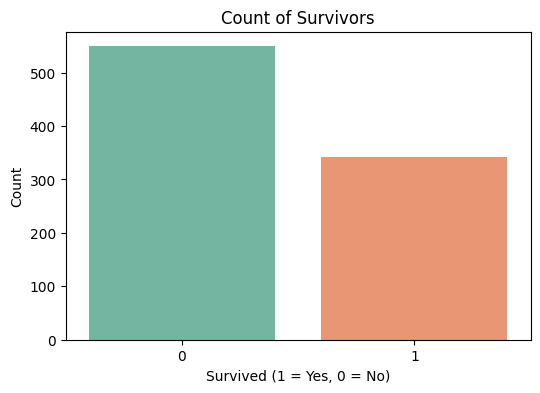

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Count of Survivors')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

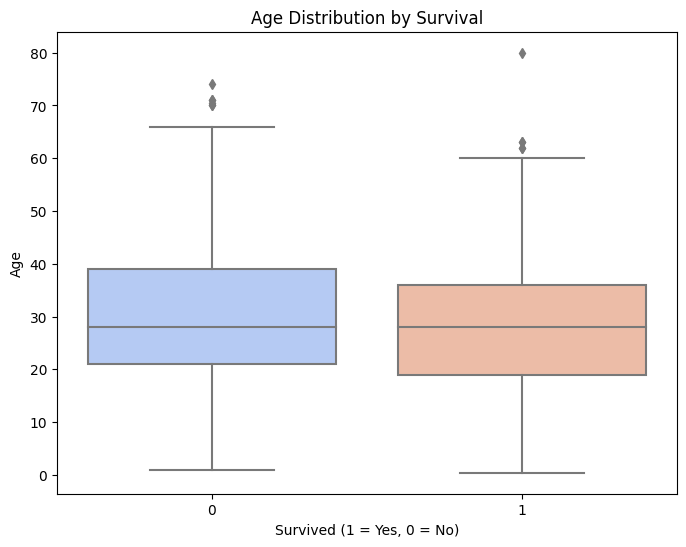

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df, palette='coolwarm')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Age')
plt.show()

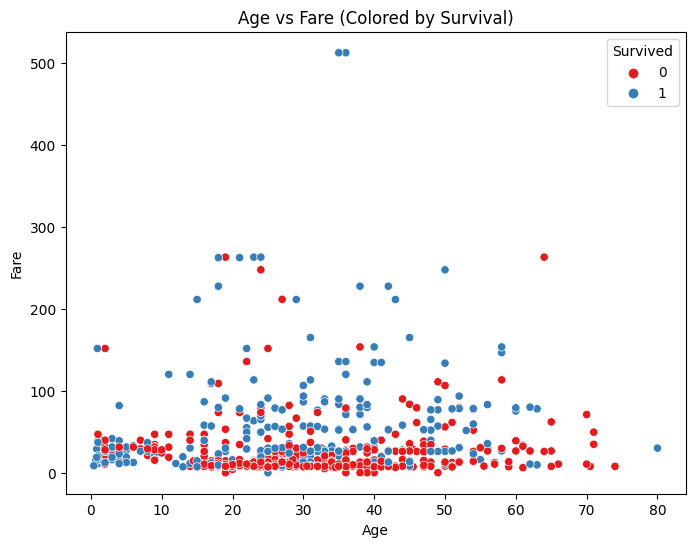

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='Set1')
plt.title('Age vs Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

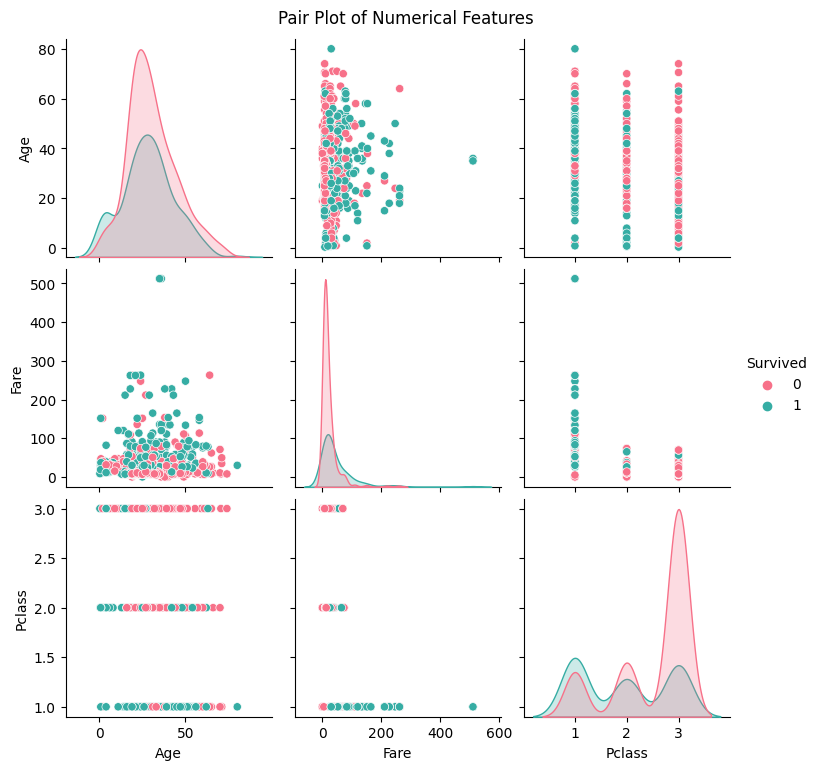

In [11]:
sns.pairplot(df[['Age', 'Fare', 'Survived', 'Pclass']], hue='Survived', palette='husl')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

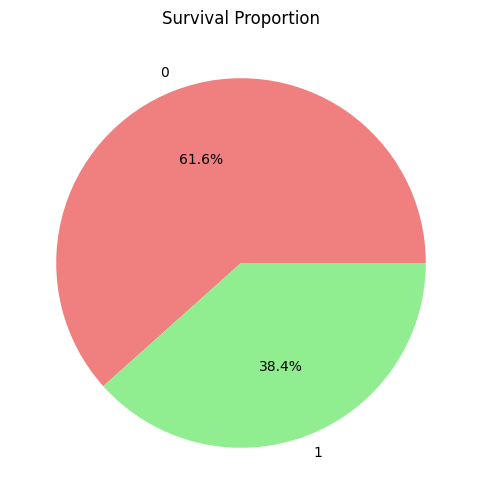

In [12]:
plt.figure(figsize=(6, 6))
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Survival Proportion')
plt.ylabel('')
plt.show()

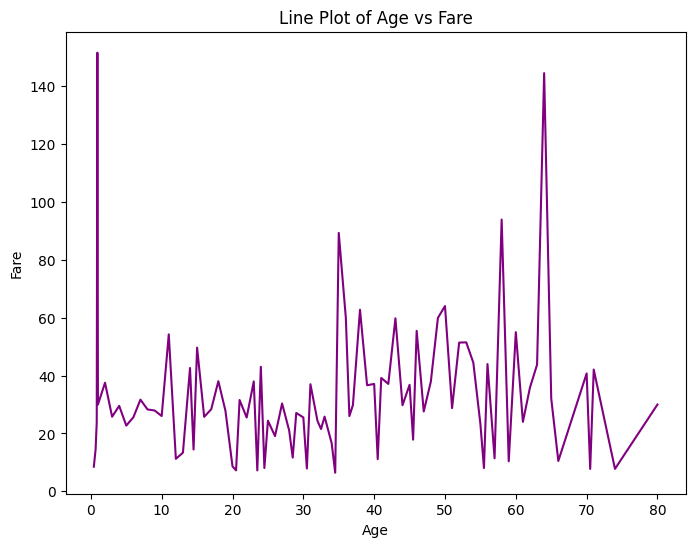

In [13]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Age', y='Fare', data=df, ci=None, color='purple')
plt.title('Line Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

## Data preprocessing

In [14]:
def clean_data(df):
    df = df.copy()
    
    # Fill missing 'Age' values with the median
    df['Age'] = df['Age'].fillna(df['Age'].median())
    
    # Fill missing 'Embarked' values with the mode
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    
    # Drop the 'Cabin' column as it has too many missing values
    df = df.drop('Cabin', axis=1)

    return df

def feature_engineer(df):
    df = df.copy()

    # Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
    df['FamilySize'] = df['SibSp'] + df['Parch']

    # Create a new feature 'IsAlone' to indicate if a passenger is alone
    df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 0 else 0)

    return df

train = clean_data(df)
train = feature_engineer(train)

# Verify if missing values are handled
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


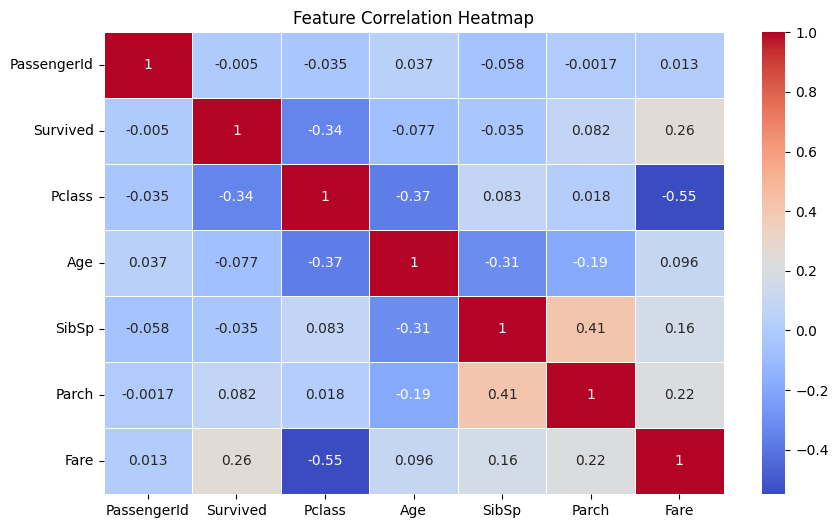

In [17]:
num_cols = df.select_dtypes(include=['number'])  

# Compute correlation matrix
corr_matrix = num_cols.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5) 
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
# Define features (X) and target (y)
X = df.drop(['Survived'], axis=1)
y = df["Survived"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(712, 11) (179, 11)


In [19]:
# Convert the dataframe to csv file
df.to_csv('train_data.csv', index=False)